# Logistic regression with Neural Network approach

Logistic regression can be seen as the simplest kind of neural network:
* Input features are fed to one node
* Forward propagation (linear representation + sigmoid activation function) to get prediction
* Cost calculation
* Backward propagation to get derivatives
* Gradient descent to update weights and bias in order to minimize cost

It is a good example to get an initial feeling of how neural networks operate.

In [18]:
# Imports
import numpy as np

import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from logistic_model import LogisticModel

In [2]:
# Generate synthetic data
X, y = dt.make_classification(n_samples=10000, n_features=10, n_informative=6, n_redundant=4, random_state=42)

In [10]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

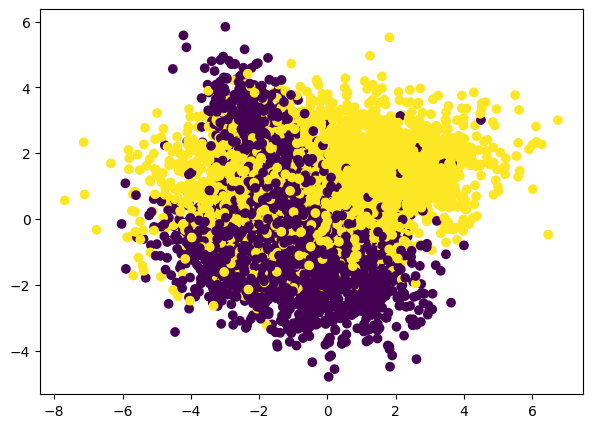

In [12]:
# Plot first two features with label
plt.figure(figsize=(7, 5))
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train)

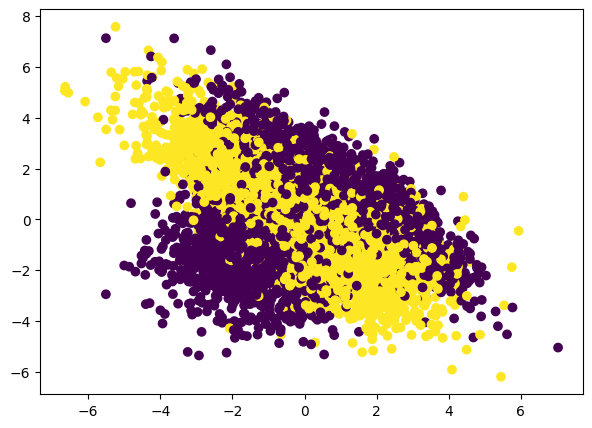

In [13]:
# Plot some other features with label
plt.figure(figsize=(7, 5))
plt.scatter(X_train[:,8], X_train[:, 9], c=y_train)

## Logistic model from Scikit-Learn

Let's train a standard classifier from scikit-learn and see how it performs.

In [20]:
# Model
clf = LogisticRegressionCV()

# Train model
clf.fit(X_train, y_train)

# Evaluation on test set
y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Logloss: {log_loss(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred)}')

Accuracy: 0.82
Logloss: 6.2170449182744845
F1 score: 0.8181818181818181


The traditional model from scikit-learn performs pretty well.

## Custom model

Now let's train a custom logistic model. This model uses a deep learning approach but where only 1 node is being activated.

First the weigths and bias (`params`) are initialized:

```python
def _init_params(self, n_x):
    """Initialize weights and bias."""
    W = np.random.randn(n_x, 1) * 0.01  # Initialize weights randomly
    b = 0.0

    params = {'W': W, 'b': b}
```

Second, for each iteration (`num_iter`) we perform the following:

**Forward propagation** in the network:

```python
def _forward_prop(self, X, W, b):
    """Forward propagation."""
    # Linear function of weights, input, and bias
    Z = np.dot(X, W) + b

    # Forward pass with sigmoid activation function
    A = _sigmoid(Z)

    assert A.shape == (X.shape[0], 1)

    return A
```

**Cost calculation** with used weights and bias:

```python
def _log_loss(self, y, A):
    """Cost function."""
    assert y.shape == A.shape
    cost = np.mean(-(y * np.log(A) + (1 - y) * np.log(1 - A)))

    return cost
```

**Backward propagation** to get derivatives (based on the `sigmoid` activation function):

```python
def _backward_prop(self, X, A, y):
    """Backward propagation."""
    # Nr examples
    m = float(X.shape[0])

    # Calculate gradients
    dW = np.dot(X.T, (A - y)) / m
    db = np.mean(A - y)

    grads = {'dW': dW, 'db': db}

    return grads
```

**Gradient descent** to update the weights and bias in order to minimize the cost:

```python
# Gradient descent
W = W - learning_rate * dW
b = b - learning_rate * db
```

All of these methods are included in the `LogisticModel` class which we will deploy now.

In [21]:
# Instantiate model object
model = LogisticModel()

In [31]:
# Train model for `num_iter` iteration with learning rate `learning_rate`
# Print cost of every 100 iteration
model.fit(X_train, y_train, num_iter=10000, learning_rate=0.5, print_cost=True)

Cost after iteration 0: 0.6801753861593391
Cost after iteration 100: 0.41556980851914804
Cost after iteration 200: 0.41540570565334706
Cost after iteration 300: 0.415403294219255
Cost after iteration 400: 0.41540325734346134
Cost after iteration 500: 0.41540325677679013
Cost after iteration 600: 0.415403256768077
Cost after iteration 700: 0.41540325676794293
Cost after iteration 800: 0.4154032567679409
Cost after iteration 900: 0.4154032567679408
Cost after iteration 1000: 0.4154032567679408
Cost after iteration 1100: 0.4154032567679408
Cost after iteration 1200: 0.4154032567679408
Cost after iteration 1300: 0.4154032567679408
Cost after iteration 1400: 0.4154032567679408
Cost after iteration 1500: 0.4154032567679408
Cost after iteration 1600: 0.4154032567679408
Cost after iteration 1700: 0.4154032567679408
Cost after iteration 1800: 0.4154032567679408
Cost after iteration 1900: 0.4154032567679408
Cost after iteration 2000: 0.4154032567679408
Cost after iteration 2100: 0.41540325676794

The model is able to train and it looks like gradient descent finds a optimum already after 900 iterations.

In [32]:
# Evaluation on test set
y_pred_ml = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_ml)}')
print(f'Logloss: {log_loss(y_test, y_pred_ml)}')
print(f'F1 score: {f1_score(y_test, y_pred_ml)}')

Accuracy: 0.82
Logloss: 6.2170449182744845
F1 score: 0.8181818181818181


The model performs in line with the scikit-learn `LogisticRegressionCV` model. That is great!

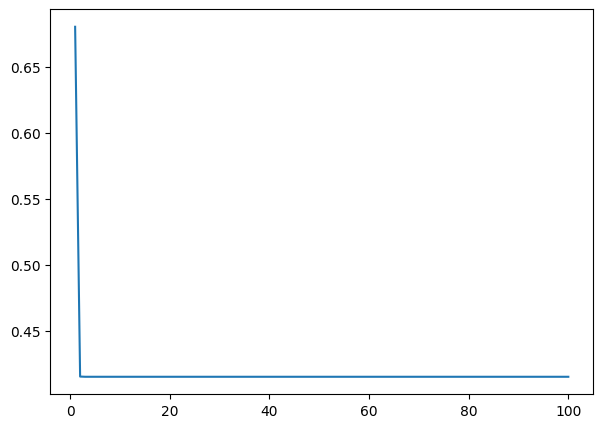

In [43]:
# Print learning curve
idx = []
cost = []
for it, c in enumerate(model.learning_rate):
    idx.append(it + 1)
    cost.append(c)

plt.figure(figsize=(7, 5))
plt.plot(idx, cost)